<h1>Proyecto 2 - probabilidad y estadistica </h1>

<h2>- Miguel Angel Nava Perez <br>
- Ana Luisa Parra Valencia </h2>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as scp
from scipy import stats 
from statsmodels.sandbox.stats.runs import runstest_1samp 
from statsmodels.formula.api import ols
import statsmodels.api as sm 
from tabulate import tabulate
from statsmodels.stats.multicomp import pairwise_tukeyhsd


def test_normalityKS(data, variable): # Pruaba de Normalidad Kolmogorov-Smirnof 
    """
    data: arreglo de datos a evaluar la normalidad
    variable: string con el nombre de la variable 
    """  
    print(f"\n Análisis de normalidad por Kolmogorov-Smirnov para '{variable}'")

    # Kolmogorov-Smirnov (KS) test
    ks_stat, ks_p = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    print(f" Estadístico = {ks_stat:.4f}, p-valor = {ks_p:.4f}")

def test_normalitySW(data, variable): # Prueba de Normalizas Shapiro-Wilks 
    """
    data: arreglo de datos a evaluar la normalidad
    variable: string con el nombre de la variable 
    """
    print(f"\n Análisis de normalidad por Shapiro-Wilk para '{variable}'")
    # Shapiro-Wilk test
    shapiro_stat, shapiro_p = stats.shapiro(data)
    print(f"Estadístico = {shapiro_stat:.4f}, p-valor = {shapiro_p:.4f}")
    
def random_test(residuos):
    """
    Parameters
    ----------
    residuos : Array
        DESCRIPTION: Residuos del ANOVA 

    Returns
    -------
    None.

    """
    _, p_runs = runstest_1samp(residuos, correction=True)

    print(f"Prueba de Runs: p-valor={p_runs}")
    
def test_homogeneityL(var1, var2, name1, name2): # Prueba de levene
    """
    var1 y var2: variables a las que se corroborará homocedasticidad 
    name1 y name2: strings con el nnombre de las variables
    """
    print(f"\n Análisis de homocedasticidad entre '{name1}' y '{name2}'")

    # Prueba de Levene (no asume normalidad)
    levene_stat, levene_p = stats.levene(var1, var2)
    print(f"Levene test: Estadístico = {levene_stat:.4f}, p-valor = {levene_p:.4f}")

def tukey(respuesta,factor, alfa,n_factor):
    """

    Parameters
    ----------
    respuesta : Array
        DESCRIPTION. Array con los datos de la variable respuesta
    factor : Array
        DESCRIPTION.Array con los niveles del factor 
    alfa : Float
        DESCRIPTION. Valor alfa de comparación 
    n_factor : String
        DESCRIPTION. Nombre del factor

    Returns
    -------
    None.

    """
    
    tukey = pairwise_tukeyhsd(respuesta, factor, alpha=alfa)
    print(f"Prueba Tukey para el factor {n_factor}")
    print(tukey)
    
def kruskal_W(df,Respuesta,Factor):
    """
    
    Parameters
    ----------
    df : Data_Frame
        DESCRIPTION. estructura con los datos del experimento
    Respuesta : String
        DESCRIPTION. nombre de la variable respuesta, key del dataframe
    Factor : String
        DESCRIPTION. nombre del factor, key del dataframe

    Returns
    -------
    None.

    """
    grupos_B = [df[Respuesta][df[Factor] == nivel] for nivel in df[Factor].unique()]
    stat_B, p_B = stats.kruskal(*grupos_B)
    print(f"Kruskal-Wallis para {Factor}: H = {stat_B:.4f}, p = {p_B:.4f}")
    
    
def kruskal_interaccion(df,Respuesta,Factor1,Factor2):
    """
    

    Parameters
    ----------
    df : Data_Frame
        DESCRIPTION. estructura con los datos del experimento
    Respuesta : String
        DESCRIPTION. nombre de la variable respuesta, key del dataframe
    Factor1 : String
        DESCRIPTION. nombre del factor1, key del dataframe
    Factor2 : String
        DESCRIPTION.nombre del factor12, key del dataframe

    Returns
    -------
    None.

    """
    
    df['interaccion'] = df[Factor1].astype(str) + "_" + df[Factor2].astype(str) # se genera una columana con las combinaciones entre factores

    grupos_interaccion = [df[Respuesta][df['interaccion'] == nivel] for nivel in df['interaccion'].unique()]
    stat_int, p_int = stats.kruskal(*grupos_interaccion)
    print(f"Kruskal-Wallis para la interacción {Factor1}x{Factor2} p = {p_int:.4f}")

def t_test_paired (before,after , nombre1,nombre2):#prueba T para datos pareados
    """
    before: variable antes 
    after: variable después
    """
    
    t_stat, p_value = stats.ttest_rel(before, after)

    # Mostrar resultados
    
    print(f"Prueba t para muestras pareadas de {nombre1} y {nombre2}, P-valor: {p_value:.4f}")

def t_test_one(data,mu,variable): #Prueba T para una muestra
    """
    data: arreglo de datos a comparar
    mu: media poblacional o valor de referencia 
    variable: string con el nombre de la variable que se está comparando
    """
    print(f"Prueba T para una sola muestra para {variable}")
    t_stat, p_value = stats.ttest_1samp(data, mu)
    print(f"Estadístico = {t_stat:.4f}, valor_p = {p_value:.4f}")

<h1>Parte 1: Comparación de Muestras

In [65]:
df = (pd.read_csv("Proyecto 2/FLIR_groups1and2.csv", sep=";" , header=2))[['Max1R13_1', 'Max1R13_2', 'Max1R13_3', 'Max1R13_4', 
        'Max1L13_1', 'Max1L13_2', 'Max1L13_3', 'Max1L13_4',
        'T_Max1', 'T_Max2', 'T_Max3', 'T_Max4',
        'T_FHCC1', 'T_FHCC2', 'T_FHCC3', 'T_FHCC4',
        'aveOralM', 'Gender', 'Age', 'Ethnicity', 'T_atm', 'Humidity', 'Cosmetics','Distance']].copy() #cargamos el dataframe


#creamos la nueva columna con el valor promediado de Max1R13 y eliminamos las demás
df['Max1R13'] = df[['Max1R13_1', 'Max1R13_2', 'Max1R13_3', 'Max1R13_4']].mean(axis=1, skipna=True).astype(float)
df.drop(columns=['Max1R13_1', 'Max1R13_2', 'Max1R13_3', 'Max1R13_4'],inplace=True) 

#creamos la nueva columna con el valor promediado de Max1L13 y eliminamos las demás
df['Max1L13'] = df[['Max1L13_1', 'Max1L13_2', 'Max1L13_3', 'Max1L13_4']].mean(axis=1, skipna=True).astype(float)
df.drop(columns=['Max1L13_1', 'Max1L13_2', 'Max1L13_3', 'Max1L13_4'],inplace=True)

#creamos la nueva columna con el valor promediado de T_Max y eliminamos las demás
df['T_Max'] = df[['T_Max1', 'T_Max2', 'T_Max3', 'T_Max4']].mean(axis=1, skipna=True).astype(float)
df.drop(columns=['T_Max1', 'T_Max2', 'T_Max3', 'T_Max4'],inplace=True)

#creamos la nueva columna con el valor promediado de TF_HCC y eliminamos las demás
df['TF_HCC'] = df[['T_FHCC1', 'T_FHCC2', 'T_FHCC3', 'T_FHCC4']].mean(axis=1, skipna=True).astype(float)
df.drop(columns=['T_FHCC1', 'T_FHCC2', 'T_FHCC3', 'T_FHCC4'],inplace=True)

#procedemos a imputar los valores nulos de cosmetics con la mediana

df["Cosmetics"] = df["Cosmetics"].fillna("No")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   aveOralM   1020 non-null   float64
 1   Gender     1020 non-null   object 
 2   Age        1020 non-null   object 
 3   Ethnicity  1020 non-null   object 
 4   T_atm      1020 non-null   float64
 5   Humidity   1020 non-null   float64
 6   Cosmetics  1020 non-null   object 
 7   Distance   1018 non-null   float64
 8   Max1R13    1020 non-null   float64
 9   Max1L13    1020 non-null   float64
 10  T_Max      1020 non-null   float64
 11  TF_HCC     1020 non-null   float64
dtypes: float64(8), object(4)
memory usage: 95.8+ KB


<h2> Analisis Exploratorio de Datos

In [66]:
# Columnas numéricas
df_num = df.select_dtypes(include=[np.number])

# Columnas categóricas (excluimos las numéricas)
df_cat = df.select_dtypes(exclude=[np.number])

metricas_num = pd.DataFrame({ 
    'Media': df_num.mean(), 
    'Mediana': df_num.median(),
    'Moda': df_num.mode().iloc[0],
    'SD': df_num.std(),
    'MAD': scp.stats.median_abs_deviation(df_num),
    'Varianza': df_num.var(),
    'IQR': df_num.quantile(0.75) - df_num.quantile(0.25),
    'CV %': (df_num.std() / df_num.median()),
    'CVM %': (scp.stats.median_abs_deviation(df_num) / df_num.median())
}).T

# Métricas para columnas categóricas: solo la Moda es significativa
indices = ["Media", "Mediana", "Moda", "SD", "MAD", "Varianza", "IQR", "CV %", "CVM %"]
metricas_cat = pd.DataFrame(index=indices, columns=df_cat.columns)
metricas_cat.loc["Moda"] = df_cat.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Unir ambos DataFrames (las columnas no se traslapan)
metricas_completas = pd.concat([metricas_num, metricas_cat], axis=1)

# Reordenar las columnas según el orden original de df
metricas_completas = metricas_completas[df.columns]

print(tabulate(metricas_completas, headers='keys', tablefmt='psql'))


+----------+-------------+----------+-------+-------------+------------+------------+-------------+------------+-------------+-------------+-------------+------------+
|          |    aveOralM | Gender   | Age   | Ethnicity   |      T_atm |   Humidity |   Cosmetics |   Distance |     Max1R13 |     Max1L13 |       T_Max |     TF_HCC |
|----------+-------------+----------+-------+-------------+------------+------------+-------------+------------+-------------+-------------+-------------+------------|
| Media    | 37.0284     | nan      | nan   | nan         | 24.1154    |  28.723    |         nan |   0.729784 | 35.5965     | 35.6115     | 36.0848     | 34.5739    |
| Mediana  | 36.94       | nan      | nan   | nan         | 24         |  26.3      |         nan |   0.62     | 35.5487     | 35.575      | 36.0275     | 34.605     |
| Moda     | 36.89       | Female   | 18-20 | White       | 24         |  30        |           0 |   0.6      | 35.6775     | 35.665      | 36.0325     | 34.40

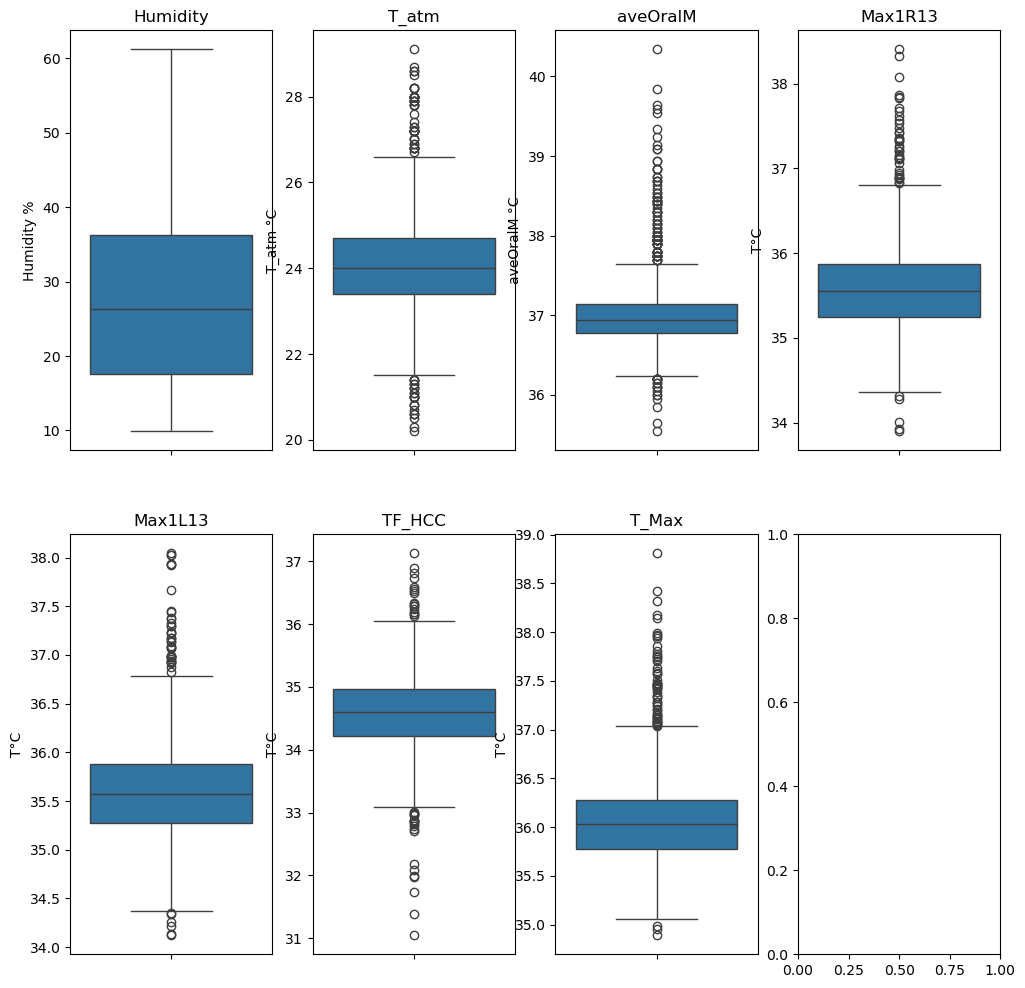

In [67]:
fig, ax = plt.subplots(2 , 4 , figsize=(12,12))

sns.boxplot(data=df_num["Humidity"], ax=ax[0][0])
ax[0][0].set_title('Humidity')
ax[0][0].set_ylabel('Humidity %')

sns.boxplot(data=df_num["T_atm"], ax=ax[0][1])
ax[0][1].set_title('T_atm')
ax[0][1].set_ylabel('T_atm °C')

sns.boxplot(data=df_num["aveOralM"], ax=ax[0][2])
ax[0][2].set_title('aveOralM')
ax[0][2].set_ylabel('aveOralM °C')

sns.boxplot(data=df_num["Max1R13"], ax=ax[0][3])
ax[0][3].set_title("Max1R13")
ax[0][3].set_ylabel('T°C')

sns.boxplot(data=df_num["Max1L13"], ax=ax[1][0])
ax[1][0].set_title('Max1L13')
ax[1][0].set_ylabel('T°C')

sns.boxplot(data=df_num["TF_HCC"], ax=ax[1][1])
ax[1][1].set_title('TF_HCC')
ax[1][1].set_ylabel('T°C')

sns.boxplot(data=df_num["T_Max"], ax=ax[1][2])
ax[1][2].set_title('T_Max')
ax[1][2].set_ylabel('T°C')
plt.show()

In [68]:
### Evaluando como se comportan los datos atipicos en una fila determinada, en este caso la del valor mas alto
#       en la temperatura oral 
indice_max = df["aveOralM"].idxmax()

print(f"""Valores de medidas fisiologicas en valores atipicos:
    aveOralM: {df["aveOralM"][indice_max]}
    Max1R13: {df["Max1R13"][indice_max]}
    Max1L13: {df["Max1L13"][indice_max]}
    T_Max: {df["T_Max"][indice_max]}
    TF_HCC: {df["TF_HCC"][indice_max]}
""")


Valores de medidas fisiologicas en valores atipicos:
    aveOralM: 40.34
    Max1R13: 38.3275
    Max1L13: 38.03
    T_Max: 38.807500000000005
    TF_HCC: 36.74



Se detectan muchos Outliers en los box-plots de todas las variables excepto la de la Humedad relativa, pero en vista de que éstas son medidas fisiológicas, y segun lo evaluado en la celda anterior, se ve que estos valores atípicos no representan un error en la medición, sino que éstos representan a personas que tenían su temperatura corporal mas alta (posiblemente fiebre) respecto a los demás en el dia que les realizaron las medidas. por lo que se decidirá conservar estos valores atipicos 


<h1>Hipótesis</h1>
El objetivo de este experimento es determinar si hay una diferencia significativa en el promedio de dos mediciones continuas por cada sujeto, una con el termógrafo y otra con el termómetro oral, dichas mediciones provienen del mismo grupo de individuos (mediciones pareadas), por tanto es apropiado hacer uso de la prueba T para muestras relacionadas para datos pareados, para los datos que tengan una distribución normal, por otro lado, si alguna de las diferencias no cumplen con el supuesto de normalidad, a esa variable se le hará la prueba de suma de rangos con signos de Wilcoxon, de la cual las hipótesis se pueden interpretar de igual forma que la de la prueba t para muestras pareadas
<h2>Hipótesis nula  </h2>

$H_{0}$

No hay diferencia significativa entre las temperaturas medidas con el termógrafo y las orales. Las técnicas son equivalentes. 

<h2>Hipótesis alternativa  </h2>

$H_{1}$

Sí hay una diferencia significativa entre las dos mediciones. Las técnicas no son equivalentes.




Primero, se comprobará que distribuciones son normales (para la prueba t pareada, se prueba la normalidad de las diferencias)

In [69]:
_Max1R = df["aveOralM"] - df["Max1R13"]

test_normalityKS(_Max1R,"Max1R13")

_Max1L = df["aveOralM"] - df["Max1L13"]

test_normalityKS(_Max1L , "Max1L13")

_Tmax = df["aveOralM"] - df["T_Max"]

test_normalityKS(_Tmax , "T_Max")

TF_hCC = df["aveOralM"] - df["TF_HCC"]

test_normalityKS(TF_hCC , "TF_HCC")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Max1R13'
 Estadístico = 0.0298, p-valor = 0.3196

 Análisis de normalidad por Kolmogorov-Smirnov para 'Max1L13'
 Estadístico = 0.0312, p-valor = 0.2671

 Análisis de normalidad por Kolmogorov-Smirnov para 'T_Max'
 Estadístico = 0.0286, p-valor = 0.3668

 Análisis de normalidad por Kolmogorov-Smirnov para 'TF_HCC'
 Estadístico = 0.0664, p-valor = 0.0002


La prueba de Kolmogorov-Smirnov tiene dos hipótesis:
- $H_{0}$: Los datos provienen de una distribucion normal
- $H_{1}$: Los datos NO provienen de una distribucion normal

De acuerdo a lo obtenido, con los p-valores de Max1R13, Max1L13, T_max. Éstos son mayores a $\alpha=$ 0.05  se toma la hipótesis nula $H_{0}$, concluyendo que los valores de cada variable ya mencionada pertenecen a una distribución normal, respectivamente.

Por otro lado, para TF_HCC se obtuvo un valor p de 0.0002, menor a $\alpha=$ 0.05, entonces tomamos la hipótesis alternativa $H_{1}$, por lo que los valores de la variable TF_HCC NO pertenecen a una distribución normal

A continuación, procederemos a hacer las pruebas elegidas para determinar si estas tecnicas de medición son equivalentes, para las que pertenecen a una distribución normal utilizaremos la prueba t para datos pareados, y para TF_HCC utilizaremos la prueba suma de rangos con signo de wilcoxon:

In [70]:
t_test_paired(df["aveOralM"] , df["Max1R13"] , "ave_oralM" , "Max1R13")

t_test_paired(df["aveOralM"] , df["Max1L13"] , "ave_oralM" , "Max1L13")

t_test_paired(df["aveOralM"] , df["T_Max"] , "ave_oralM" , "T_Max")

t_test_paired(df["aveOralM"] , df["TF_HCC"] , "ave_oralM" , "TF_HCC")

print(f"Prueba de rangos con signo para de La temperatura oral y TF_HCC:\n  {scp.stats.wilcoxon(df["aveOralM"],df["TF_HCC"])}")

Prueba t para muestras pareadas de ave_oralM y Max1R13, P-valor: 0.0000
Prueba t para muestras pareadas de ave_oralM y Max1L13, P-valor: 0.0000
Prueba t para muestras pareadas de ave_oralM y T_Max, P-valor: 0.0000
Prueba t para muestras pareadas de ave_oralM y TF_HCC, P-valor: 0.0000
Prueba de rangos con signo para de La temperatura oral y TF_HCC:
  WilcoxonResult(statistic=0.0, pvalue=1.8210062850136926e-168)


<h1>Conclusion </h1>
de acuerdo a las hipotesis ya planteadas, todos los valores p que se obtuvieron, 0.0 para Max1R13, Max1L13, y T_Max, y un valor efectivamente igual a cero para TF_HCC, todos son menores a $\alpha=$ 0.05, por lo que para todas estas variables respecto a la temperatura promedio oral tomada con un termometro oral en modo monitoreo, tomaremos la hipotesis $H_{1}$, concluyendo que no son técnicas equivalentes, segun las pruebas estadisticas realizadas.

<h1>Parte 2: Análisis de varianza</h1>

+----------+--------------+
|          |   Viabilidad |
|----------+--------------|
| Media    |   101.884    |
| Mediana  |    98.6111   |
| Moda     |    80.1719   |
| SD       |    23.5526   |
| MAD      |    18.0556   |
| Varianza |   554.724    |
| IQR      |    31.3869   |
| CV %     |     0.238843 |
| CVM %    |     0.183099 |
+----------+--------------+

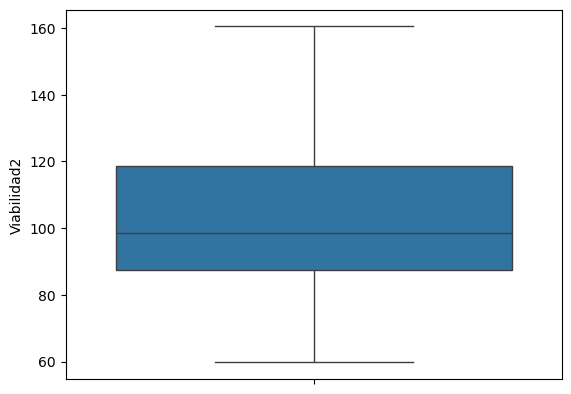

In [71]:
df1 = (pd.read_excel("Proyecto 2/A375.xlsx")).copy() #cargamos el dataframe

Viabilidad = df1["Viabilidad2"]

metricas = pd.DataFrame(
    data=[
        Viabilidad.mean(), 
        Viabilidad.median(),
        Viabilidad.mode().iloc[0],
        Viabilidad.std(),
        scp.stats.median_abs_deviation(Viabilidad),
        Viabilidad.var(),
        Viabilidad.quantile(0.75) - Viabilidad.quantile(0.25),
        Viabilidad.std() / Viabilidad.median(),
        scp.stats.median_abs_deviation(Viabilidad) / Viabilidad.median()
    ],
    index=["Media", "Mediana", "Moda", "SD", "MAD", "Varianza", "IQR", "CV %", "CVM %"],
    columns=["Viabilidad"]
)


# Métricas para columnas categóricas: solo la Moda es significativa
indices1 = ["Media", "Mediana", "Moda", "SD", "MAD", "Varianza", "IQR", "CV %", "CVM %"]
metricas_cat1 = pd.DataFrame(index=indices, columns=df_cat.columns)
metricas_cat1.loc["Moda"] = df_cat.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

print(tabulate(metricas, headers='keys', tablefmt='psql'))

sns.boxplot(Viabilidad)
plt.show()


<h2>

primero comprobamos la normalidad de la variable respuesta, como este conjunto de datos tiene menos de 50 datos, se utilizará la prueba de Shapiro-Wilk, ésta prueba tiene dos hipótesis:
- $H_{0}$: Los datos provienen de una distribucion normal
- $H_{1}$: Los datos NO provienen de una distribucion normal

In [72]:
## Prueba de normalidad
test_normalitySW(df1["Viabilidad2"] , "Viabilidad2")


 Análisis de normalidad por Shapiro-Wilk para 'Viabilidad2'
Estadístico = 0.9614, p-valor = 0.4675


de acuerdo al valor p = 0.4675, mayor a ${\alpha}=$ 0.05, rechazamos $H_{1}$ y aceptamos $H_{0}$, por lo que los datos de la variable respuesta si pertenecen a una distribucion normal

A continuación verificaremos el supuesto de homocedasticidad en los factores con la prueba de levene, esta prueba tiene las siguientes hipotesis:

- $H_{0}$: Los grupos de datos presentan varianza constante
- $H_{1}$: Los grupos de datos NO presentan varianza constante


In [73]:
## Prueba de Homocedasticidad
Bloque2_3 = df1[df1["Bloque2"] == 3]
Bloque2_4 = df1[df1["Bloque2"]== 4]

Estimulo2_1 = df1[df1["Estimulo2"] == 1]
Estimulo2_2 = df1[df1["Estimulo2"]== 2]

Tiempo2_1 = df1[df1["Tiempo2"] == 1]
Tiempo2_7 = df1[df1["Tiempo2"]== 7]

print("---"*20)
_ , levene_p = stats.levene(Bloque2_3["Viabilidad2"] , Bloque2_4["Viabilidad2"] )
print(f"Levene test para Bloque2: p-valor = {levene_p}\n")

_ , levene_p = stats.levene(Estimulo2_1["Viabilidad2"] , Estimulo2_2["Viabilidad2"] )
print(f"Levene test paricEstimulos-valor = {levene_p}\n")

_ , levene_p = stats.levene(Tiempo2_1["Viabilidad2"] , Tiempo2_7["Viabilidad2"] )
print(f"Levene test para Tiempo-valor = {levene_p}\n")

------------------------------------------------------------
Levene test para Bloque2: p-valor = 0.4728309543255004

Levene test paricEstimulos-valor = 0.34397468724013025

Levene test para Tiempo-valor = 0.17525496512635422



de acuerdo al p-valor obtenido para los 3 factores, el cual es mayor al ${\alpha}=0.05$, aceptamos $H_{0}$, por lo que se concluye que los 3 factores son homocedasticos en sus niveles

<h2>Supuestos</h2>
 De acuerdo a la prueba de normalidad de Shapiro-Wilk y la prueba Levene  realizadas los datos son normales y homocedasticos, por lo que procederemos a realizar el modelo ANOVA, para cada efecto, el modelo tiene las siguiente hipotesis:
 
 - $H_{0}$: El efecto es igual a cero, es decir que el factor no es significativo
 - $H_{1}$: El efecto es diferente de cero, es decir que el factor es significativo
 
 Al encontrar factores o interacciones que no tengan efecto significativo de acuerdo a las hipótesis ya planteadas, se irán eliminando uno a uno de el modelo ANOVA para observar como se comporta la significancia de nuestros factores

In [74]:
modelo = ols('Viabilidad2 ~ C(Bloque2)*C(Estimulo2)*C(Tiempo2)', data=df1).fit()

anova_table = sm.stats.anova_lm(modelo, typ=3)

# Mostrar resultados
print(tabulate(anova_table,headers='keys',tablefmt='heavy_grid'))

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃                                    ┃       sum_sq ┃   df ┃           F ┃       PR(>F) ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━━━━━┫
┃ Intercept                          ┃ 34954.4      ┃    1 ┃ 131.887     ┃   3.8779e-09 ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━━━━━┫
┃ C(Bloque2)                         ┃  1001.32     ┃    1 ┃   3.7781    ┃   0.0697302  ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━━━━━┫
┃ C(Estimulo2)                       ┃    45.8235   ┃    1 ┃   0.172898  ┃   0.683073   ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━━━━━┫
┃ C(Tiempo2)                         ┃   693.645    ┃    1 ┃   2.61721   ┃   0.125252   ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━━━━━┫
┃ C(Bloque

Se puede observar que todos los factores e interacciones entre factores tienen un p-valor mayor a ${\alpha}=0.05$, por lo que se toma $H_{0}$, ósea que no son significativos, procederemos a eliminar la interaccion entre los 3 factores

In [75]:
#Borramos el menos significativo (el de mayor valor p)
modelo = ols('Viabilidad2 ~ C(Bloque2)+C(Tiempo2)+C(Estimulo2) + C(Bloque2):C(Estimulo2) + C(Bloque2):C(Tiempo2) + C(Estimulo2):C(Tiempo2) + C(Estimulo2):C(Tiempo2)', data=df1).fit()

anova_table = sm.stats.anova_lm(modelo, typ=3)

# Mostrar resultados
print(tabulate(anova_table,headers='keys',tablefmt='heavy_grid'))

┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃                         ┃     sum_sq ┃   df ┃          F ┃        PR(>F) ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ Intercept               ┃ 37543.3    ┃    1 ┃ 149.002    ┃   7.74599e-10 ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(Bloque2)              ┃  1508.88   ┃    1 ┃   5.98842  ┃   0.0255622   ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(Tiempo2)              ┃   687.479  ┃    1 ┃   2.72846  ┃   0.116923    ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(Estimulo2)            ┃   110.066  ┃    1 ┃   0.436831 ┃   0.517514    ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(Bloque2):C(Estimulo2) ┃   172.001  ┃    1 ┃   0.682635 ┃   0.420126    ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫

se puede observar que el valor p de Bloque ahora es menor al valor ${\alpha}=0.05$, por lo que este factor, osea el recubrimiento de PEG tiene un efecto significativo en la viabilidad celular, se procede a eliminar la interacción entre Estimulo y Tiempo, la cual cuenta con el mayor p-valor, $i.e.$ el que es menos significativo

In [76]:
modelo = ols('Viabilidad2 ~ C(Bloque2)+C(Tiempo2)+C(Estimulo2) + C(Bloque2):C(Estimulo2) + C(Bloque2):C(Tiempo2)', data=df1).fit()

anova_table = sm.stats.anova_lm(modelo, typ=3)

# Mostrar resultados
print(tabulate(anova_table,headers='keys',tablefmt='heavy_grid'))

┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃                         ┃     sum_sq ┃   df ┃          F ┃        PR(>F) ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ Intercept               ┃ 42692.8    ┃    1 ┃ 178.259    ┃   8.89181e-11 ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(Bloque2)              ┃  1516.44   ┃    1 ┃   6.3317   ┃   0.0215647   ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(Tiempo2)              ┃   841.953  ┃    1 ┃   3.51547  ┃   0.0771185   ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(Estimulo2)            ┃   258.639  ┃    1 ┃   1.07992  ┃   0.312475    ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(Bloque2):C(Estimulo2) ┃   168.225  ┃    1 ┃   0.702405 ┃   0.412968    ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫

se puede observar que el p-valor de el factor de Bloque ha disminuido, lo que mantiene su "significancia". pero en los demás factores e interacciones no se han observado cambios significativos, por lo que procederemos a eliminar la siguiente interaccion con mayor p-valor, esta será la interacción entre los factores Bloque y Tiempo

In [77]:
modelo = ols('Viabilidad2 ~ C(Bloque2)+C(Tiempo2)+C(Estimulo2) + C(Bloque2):C(Estimulo2)', data=df1).fit()

anova_table = sm.stats.anova_lm(modelo, typ=3)

# Mostrar resultados
print(tabulate(anova_table,headers='keys',tablefmt='heavy_grid'))

┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃                         ┃    sum_sq ┃   df ┃          F ┃        PR(>F) ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ Intercept               ┃ 48919.2   ┃    1 ┃ 214.224    ┃   8.46836e-12 ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(Bloque2)              ┃  1774.98  ┃    1 ┃   7.7729   ┃   0.0117263   ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(Tiempo2)              ┃  1784.31  ┃    1 ┃   7.81374  ┃   0.011541    ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(Estimulo2)            ┃   258.639 ┃    1 ┃   1.13262  ┃   0.300557    ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(Bloque2):C(Estimulo2) ┃   168.225 ┃    1 ┃   0.736683 ┃   0.401424    ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ Residual  

Se puede observar ahora que el factor de tiempo (1 o 7 días) tiene un p-valor de 0.0115, menor a ${\alpha}=0.05$, entonces tomamos $H_{1}$ por lo que el tiempo de 1 o 7 días SI tiene un efecto significativo en la viabilidad celular, a continuación eliminaremos la interaccion entre los factores Bloque y Estimulo pues su valor p es mayor al ${\alpha}=0.05$, osea que NO son significativos

In [78]:
modelo = ols('Viabilidad2 ~ C(Bloque2)+C(Tiempo2)+C(Estimulo2)', data=df1).fit()

anova_table = sm.stats.anova_lm(modelo, typ=3)

# Mostrar resultados
print(tabulate(anova_table,headers='keys',tablefmt='heavy_grid'))

┏━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃              ┃   sum_sq ┃   df ┃         F ┃        PR(>F) ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ Intercept    ┃ 56163.7  ┃    1 ┃ 249.23    ┃   9.3379e-13  ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(Bloque2)   ┃  5261.22 ┃    1 ┃  23.347   ┃   0.000101262 ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(Tiempo2)   ┃  1784.31 ┃    1 ┃   7.91799 ┃   0.0107223   ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(Estimulo2) ┃  1025.18 ┃    1 ┃   4.5493  ┃   0.0455109   ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ Residual     ┃  4506.97 ┃   20 ┃ nan       ┃ nan           ┃
┗━━━━━━━━━━━━━━┻━━━━━━━━━━┻━━━━━━┻━━━━━━━━━━━┻━━━━━━━━━━━━━━━┛


Ahora, se puede observar que el factor Estimulo tiene un valor p=0.04 menor a ${\alpha}=0.05$, por lo que tomamos $H_{1}$, concluyendo que los dos estimulos de radiofrecuencias SI tienen un efecto significativo en la viabilidad celular, junto a los otros 2 factores

A continuación, corroboraremos el supuesto de normalidad(con prueba de normalidad y QQ-plot) y independencia de los residuos del ANOVA


In [79]:
residuos = modelo.resid
# normalidad en los residuos 

test_normalitySW(residuos,'Residuos')


 Análisis de normalidad por Shapiro-Wilk para 'Residuos'
Estadístico = 0.9742, p-valor = 0.7696


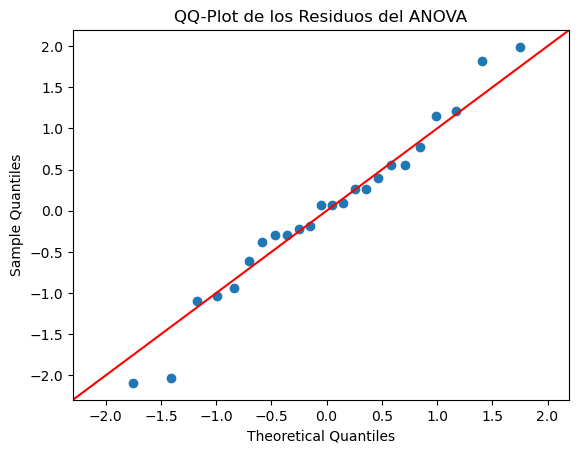

In [80]:
sm.qqplot(residuos, line='45', fit=True)
plt.title("QQ-Plot de los Residuos del ANOVA")
plt.show()

De acuerdo a lo obtenido por la prueba de normalidad de Shapiro-Wilk, se obtuvo un p-valor de 0.76, mayor al valor ${\alpha}=0.05$, por lo que tomaríamos la hipotesis nula de esta prueba $H_{0}$, la cual dice que los datos pertenecen a una distribucion normal

In [81]:
random_test(residuos)

Prueba de Runs: p-valor=0.8609237034263656


De la prueba de Runs, la cual tiene las siguientes hipotesis: 
- $H_{0}$: La secuencia es aleatoria
- $H_{1}$: La secuencia NO es aleatoria

debido a que obtuvimos un p-valor de aproximadamente 0.86, mayor que el ${\alpha}=0.05$, entonces rechazamos $H_{1}$ y tomamos $H_{0}$, concluyendo que los residuos son aleatorios

Cumpliendo estos supuestos respecto a los residuos del ANOVA, entonces podemos concluir que no hay un sesgo en los datos

<h1>Comparaciones múltiples</h1>
Para este experimento no es necesario la realización de comparaciones múltiples ya que todos los los factores poseen niveles binarios signficativos, es decir, ningún factor posee más de  3 niveles significativos, por tanto, no sería útil realizar una prueba Tukey o prueba T pariada para determinar si hay diferencias entre los diferentes niveles de cada factor.

<h1>Hipótesis</h1>

<h3>"La viabilidad de células A375 se reduce significativamente cuando se exponen a nanopartículas de oro recubiertas con PEG durante mayor tiempo y con estímulo de radiofrecuencia, debido a un efecto térmico inducido".</h3>


El análisis de varianza realizado sobre los datos de viabilidad celular en células A375 indica que los tres factores evaluados tienen efectos estadísticamente significativos sobre la viabilidad celular. Es decir, estos factores influyen de manera importante en los resultados del experimento.

Sin embargo, aunque se identificaron diferencias significativas, los valores de viabilidad observados son, en general, altos (superiores al 80% en la mayoría de los casos), lo cual no respalda completamente la hipótesis de que la combinación del recubrimiento con PEG, mayor tiempo de exposición y estimulación con radiofrecuencia cause una reducción drástica en la viabilidad celular.

Adicionalmente, no se incluyó un grupo control (es decir, células no tratadas con nanopartículas ni estímulo), lo que impide establecer una línea base con la cual comparar si la viabilidad celular realmente disminuyó o aumentó tras el tratamiento. Sin esta comparación directa con un control, no es posible concluir con certeza si los tratamientos evaluados inducen muerte celular o si, por el contrario, pueden estar favoreciendo la viabilidad. 

Por tanto, se conluye que, aunque los factores estudiados afectan significativamente la viabilidad celular, los datos no permiten confirmar la hipótesis de que el tratamiento induce muerte celular  por efecto térmico. Se debería incluir un grupo control en estudios futuros y analizar las medias por grupo para identificar condiciones específicas que puedan inducir un efecto citotóxico más claro. 